In [1]:
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

In [4]:
# train = pd.read_csv('/Users/mtjen/Desktop/313/project/train.csv')
train = pd.read_csv('train.csv')
train

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [5]:
charsToCheck = ['!', '@', '#', '?', '.', ',', 'http']
vowels = {'a', 'e', 'i', 'o', 'u', 'A', 'E', 'I', 'O', 'U'}

hasLocation = []
tweetNumberOfChars = []
specialCharacters = []
numberOfWords = []
avgCharsPerWord = []
numNumericTweet = []
numLettersTweet = []
numUpperTweet = []
numVowelsTweet = []
numConsonantsTweet = []

for index in range(len(train)):
    ##### location
    location = 0
    if pd.isnull(train['location'][index]) == False:
            location = 1
    
    ###### tweet
    text = train['text'][index]
    # number of characters in twets
    numCharsTweet = len(text)
    
    # number of specific special characters in tweet
    specialChars = []
    for specialChar in charsToCheck:
        numSpecialChar = text.count(specialChar)
        specialChars.append(numSpecialChar)
    
    # average characters per word
    words = text.split()
    lenWords = []
    numNumeric = 0
    numLetters = 0
    numUpper = 0
    numVowels = 0
    numConsonants = 0
    for word in words:
        wordLength = len(word)
        lenWords.append(wordLength)
        
        # number of letters/numbers, uppercase, vowels, consonants
        for char in word:
            if char.isnumeric():
                numNumeric += 1
            if char.isalpha():
                numLetters += 1
                if char.isupper():
                    numUpper += 1
                if char in vowels:
                    numVowels += 1
                else:
                    numConsonants += 1
        
    wordLengthAvg = np.mean(lenWords)
    
    # number of words
    numWords = len(words)
    
    hasLocation.append(location)
    tweetNumberOfChars.append(numCharsTweet)
    specialCharacters.append(specialChars)
    numberOfWords.append(numWords)
    avgCharsPerWord.append(wordLengthAvg)
    numNumericTweet.append(numNumeric)
    numLettersTweet.append(numLetters)
    numUpperTweet.append(numUpper)
    numVowelsTweet.append(numVowels)
    numConsonantsTweet.append(numConsonants)

    
# specials
numEx = []
numAt = []
numHash = []
numQ = []
numPeriod = []
numComma = []
numLinks = []
numPunc = []

for tweetCharacters in specialCharacters:
    totalPunc = 0
    for index in range(len(charsToCheck)):
        value = tweetCharacters[index]
        totalPunc += value
        if index == 0:
            numEx.append(value)
        elif index == 1:
            numAt.append(value)
        elif index == 2:
            numHash.append(value)
        elif index == 3:
            numQ.append(value)
        elif index == 4:
            numPeriod.append(value)
        elif index == 5:
            numComma.append(value)
        elif index == 6:
            numLinks.append(value)
    numPunc.append(totalPunc)

In [6]:
# create new dataframe
colNames = ['hasLocation', 'tweetNumberOfChars', 'numberOfWords', 'numEx', 'numAt', 
            'numHash', 'numQ', 'numPeriod', 'numComma', 'numLinks', 'numPunc',
            'avgCharsPerWord', 'numNumericTweet', 'numLettersTweet', 'numUpperTweet',
            'numVowelsTweet', 'numConsonantsTweet']
colValues = [hasLocation, tweetNumberOfChars, numberOfWords, numEx, numAt, numHash,
             numQ, numPeriod, numComma, numLinks, numPunc, avgCharsPerWord, numNumericTweet, 
             numLettersTweet, numUpperTweet, numVowelsTweet, numConsonantsTweet]

test = pd.DataFrame()
for index in range(len(colNames)):
    colName = colNames[index]
    colVals = colValues[index]
    test[colName] = colVals

    
test['target'] = train['target']

test

,hasLocation,tweetNumberOfChars,numberOfWords,numEx,numAt,numHash,numQ,numPeriod,numComma,numLinks,numPunc,avgCharsPerWord,numNumericTweet,numLettersTweet,numUpperTweet,numVowelsTweet,numConsonantsTweet,target
0,0,69,13,0,0,1,0,0,0,0,1,4.384615,0,56,10,25,31,1
1,0,38,7,0,0,0,0,1,0,0,1,4.571429,0,31,5,13,18,1
2,0,133,22,0,0,0,0,1,0,0,1,5.090909,0,109,2,45,64,1
3,0,65,8,0,0,1,0,0,1,0,2,7.125000,5,50,1,24,26,1
4,0,88,16,0,0,2,0,0,0,0,2,4.500000,0,70,3,25,45,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7608,0,83,11,0,0,0,0,1,0,1,2,6.636364,1,67,7,20,47,1
7609,0,125,20,0,2,0,0,2,0,0,4,5.300000,0,101,6,39,62,1
7610,0,65,8,0,0,0,1,3,0,1,5,7.250000,9,38,10,12,26,1
7611,0,137,19,0,0,0,0,2,0,0,2,6.263158,0,114,4,49,65,1


<AxesSubplot:>

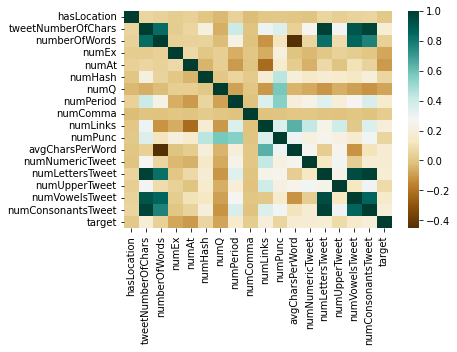

In [12]:
# Make heatmap to visualize
import seaborn as sns
sns.heatmap(test.corr(), cmap='BrBG')

In [ ]:


train['text'][7611]

In [6]:
# split to train and test data
trainData = test.sample(frac = 0.8, random_state = 25)
testData = test.drop(trainData.index)

stopIndex = test.shape[1] - 1

trainArray = trainData.values
trainX = trainArray[:,0:stopIndex]
trainY = trainArray[:,stopIndex]

testArray = testData.values
testX = testArray[:,0:stopIndex]
testY = testArray[:,stopIndex]

model = RandomForestClassifier()
model.fit(trainX, trainY)
model.score(testX, testY)

0.6953381483913329

In [61]:
tweetTest = []
for index in range(len(train)):
    tweet = train['text'][index]
    tweetTest.append(tweet)

In [62]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(tweetTest)
print(X.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [69]:
xArray = X.toarray()
for vals in xArray:
    print(vals)

[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0.         0.41744665 0.         ... 0.         0.         0.        ]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0.